# Game Studies Journal Scraper: Annotated Source Code

by Constantinos Miltiadis    
Department of Design & Department of Architecture; School of ARTS, Aalto University, Helsinki  
[studioany.com](http://studioany.com/)

**Description**: This is a fully annotated Python program that scrapes all non-text media from all entries of the [Game Studies Journal (gamestudies.org)](https://gamestudies.org/), and generates graphs with the results. 
Its purpose is to mine and visualize statistics about the use of other-than-text media in Game Studies entries (i.e. images, tables, links, iframes, etc.), and provide data to discuss more generally the use of such media in game studies discourse and research communication. 

This program was produced for and as part of the contribution:  
***Other than Text: Media Used in Game Studies Publications. A Computational Analysis into 20 Years of Publications of the Game Studies Journal, and an Appeal for Research Through Design***,   
accepted for publication in the Proceedings of the [2023 DiGRA International Conference: Limits and Margins of Games](https://digra2023.org/).   

This source code artifact is part of the abovementioned contribution, and was originally submitted for peer review together with the paper. It is temporarily hosted on the author's private GitHub account, pending action by the [DiGRA](http://www.digra.org/) board for hosting and archiving contribution artifacts that cannot be accommodated within traditional paper formats.  
The initial version of this contribution was submitted to the Game Studies Journal. 

**Note**: The present study and related paper were conducted, tested, and compiled in late 2021, prior to the publication of journal issue 2021/04 (published in December 2021). To keep this source code consistent with the submitted paper and its data, a clause was added to limit the inquiry until issue 2021/3. The associated flag (`scanAllIssues`), will generate a notification of this limitation, and can be raised to `True`, in order to run the code and generate visualizations for all issues (see comments in *Part 2*).


## Source code structure 

- Part 1: Setup - library imports, main variable declarations, and basic web-scraping functions. 
- Part 2: Scan journal archive for entries and scrape basic data (entry titles, issue id, image URLs, and HTML tables).
- Part 3: Create dataframe (spreadsheet) of journal entries; plot image and HTML table frequency in single entries. 
- Part 4: Create dataframe of journal issues; plot image count per issue. 
- Part 5: Create dataframe with all images from journal entries; export list as CSV; import CSV after manual classification of images; plot frequency of image types; plot frequency of media combination amount per paper; plot detailed media combinations per paper; plot combination frequency per each media. 
- Part 6: Scan entries for hyperlinks and video links; plot amount of video links per entry; plot most popular websites referenced in hyperlinks. 
- Part 7: Annex section - functions to download all images hosted by the journal used for *Part 5*, and an inconclusive function to scrape author names. 


## Key data scraping features 

From all entries: 
- [x] Scrape and save all images. 
- [x] Scrape entry titles. 
- [ ] [Inconclusive] Scrape author names: Impossible to be done automatically for all entries; authors are entered inconsistently throughout the Journal. A function that partially works is provided in *Part 7*, returning "JANE DOE" for unresolved authors. Nevertheless, for this inquiry author names are not necessary. 
- [x] Scan for HTML tables. 
- [x] Scan for iframes e.g. embedded YouTube videos (only one case).
- [x] Download animated GIFs (only one case).
- [x] Scan for HTML hyperlinks and links to video material (YouTube, Vimeo, Twitch.tv, etc.).
- [x] Scan for linked files e.g. '.wav' files  (only one case)

## Journal archive structure, conventions & caveats

The following scans and filters data from the list of links provided in the archive page of the journal (http://gamestudies.org/2103/archive ; the URL stored in the variable `gameStudiesArchiveUrl` in *Part 1*) which lists all issues (from older to newer) and all entries (alphabetically by author).

The Game Studies web archive is rather inconsistent with its entries. 
- There is no automated way to figure out if an entry is an editorial, a book review, or an actual paper -- entries are not consistently marked via HTML formatting or keywords. Practically, distinguishing entry types can be done manually since the overall amount of content is not very large. However, this is beyond the scope of this inquiry, which intends to follow an automated approach. Therefore, findings refer to *Journal entries*, rather than papers. 
- It's also practically impossible to retrieve the author names, abstracts, or keywords of an entry consistently and throughout the journal, since such fields are not consistently formatted with HTML tags (see also code annotations and comments in the paper).

The general structure of the Journal is one Volume per year (since 2001), each containing multiple Issues. 
Each Issue has an `issueId` which is the Volume number (the last 2 digits of the year), followed by 2 digits representing the Issue number. 
`IssueId` 0102, for example, is Volume 1 (published in 2001), Issue 2. 
The latest issue, at the time of writing, has `issueId` 2103, which is Volume 21, year 2021, Issue 3. 

URL conventions for entries: 
- **Issues before 2006**, follow a different URL convention, as in: 
    `<journal url>/<issueId>/<author_surname(s)>`
as in:  http://www.gamestudies.org/0102/newman/
- **Issues from 2006** onwards maintain the convention: 
   `<journal url>/<issueId>/articles/<descriptor>`
   as in http://gamestudies.org/0601/articles/arnseth
   ; the 'descriptor' is often the surname(s) of the authors, but the convention is frequently broken.

As of 10/2021 (issue 2103) the number of unique issues is 41, and the number of unique entries is 279. 

The 279 entries found:
- EXCLUDE: 
    - "Call for paper" entries -- which have a 'cfp' prefix to their URL and they can be filtered out. 
- INCLUDE: 
    - Editorials, that cannot be excluded automatically as they are not clearly marked (besides the first few editorials that go by a different URL convention). 
    - Book reviews. While some book reviews are marked in the title, or URL, most can only be identified from the Issue description, or by reading the content of the entry. Book reviews do not have keywords, however, that appears to be the case for some paper entries as well. Thus, there is no algorithmic way of filtering them out.
    - Other known unmarked entry types such as interviews. 

## Key metrics 

**Parameter** | **Amount/case(s)**
:--|:--
Number of issues | 41 (until volume 21, issue 3; 2001-2021)
Number of entries | 279 (including, book reviews, interviews, and most editorials that cannot be excluded computationally)
Number of images (overall) | 659 (in 109 entries; 39%) 
Number of HTML tables (overall) | 70 (in 36 entries; 13%)
Entries with images or tables | 124 (44%)
Image filetypes | JPG (77%), GIF (12%), PNG (11%; although not provisioned)
Images types found | 16
Embedded content (iframes) | one case (YouTube video) <!--'0401/whalen/' -->
Animated GIFs| one case
Sound files | one case
Amount of referenced video links | 93 (in 29 entries; 10%)
Most used media type | Videogame screenshot (44% of all images)
Most combined media type | Videogame screenshot (in 56% of unique combinations) 
Most common hyperlink | "gamestudies.org" (137 instances in 62 entries; 22%)
Most referenced hyperlink | DOI links (306 instances in 37 entries; 13%)

### Special media cases 
- Use of WAV audio files (16 in total), together with images and musical scores:     
    Whalen, Zach. ‘Play Along - An Approach to Videogame Music’. Game Studies 4, no. 1 (November 2004). https://www.gamestudies.org/0401/whalen/.
- The only use of an inline frame (iframe), which positioned in the text body:  
    Adams, Meghan Blythe, and Nathan Rambukkana. ‘“Why Do I Have to Make a Choice? Maybe the Three of Us Could, Uh...”: Non-Monogamy in Videogame Narratives’. Game Studies 18, no. 2 (September 2018). http://gamestudies.org/1802/articles/adams_rambukkana.
- Text hyperlinks to (large) images which do not appear in the text (diagrams):  
    Tuur Ghys. ‘Technology Trees: Freedom and Determinism in Historical Strategy Games’. Game Studies 12, no. 1 (September 2012). https://www.gamestudies.org/1201/articles/tuur_ghys.
- The only case of an animated GIF (Figure 2, depicting the 'game of life' algorithm):  
    Soler-Adillon, Joan. ‘The Open, the Closed and the Emergent: Theorizing Emergence for Videogame Studies’. Game Studies 19, no. 2 (October 2019). https://gamestudies.org/1902/articles/soleradillon.



## License

The present is provided under a *General Public License* -- copyleft license -- for corroboration of the inquiry as well as for encouraging modifications, derivatives, and extensions of this work. 

## Use 

- This program can be executed via Jupyter. It is adviced to clone or download this repository, and run the IPYNB file via Jupyter. Pressing the play button will execute the program cell by cell. This, given that Python and [Jupyter (https://jupyter.org/)](https://jupyter.org/) are installed. 
- Certain cells require downloading and processing data which might take a few minutes, depending on internet connection speeds. In these cases the progress of the prgram is printed in text. Most blocks should run instanstaneously. In case of errors, it is advised to restart the Kernel and run the program from the beginning. 

## Acknowledgements 
I would like to thank Petros Koutsolampros and Andreas Kelemen for their assistance with coding and graph visualizations, and Miro Roman for his help with a first proof of concept image scraper developed in Mathematica in 2021. 

## Part 1: Setup
### 1.1 Import libraries for web scraping, load functions & set main variables

Note: Manually create subfolders for exporting data, corresponding to the names of the variables `imageExportFolder` and `dataExportFolder` (here `img_export` and `data_export`). If such folders don't exist, the next cell will pop a notification.

In [2]:
#library imports 
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import urljoin, urlparse
import re
import os # for joining paths 

#Using the Game Studies Archive page, which lists all published contributions 
gameStudiesArchiveUrl="http://gamestudies.org/2103/archive"

#boolean to save graphs
savePlots=True
#boolean to save dataframes
saveDataframes=False 

#Folders to export - they should already exist 
dataExportFolder='data_export'# folder to save graphs and image list CSV file
imageExportFolder="img_export" # folder to download all journal images into (used in *Part 7*)
#safety check 
if (os.path.isdir(dataExportFolder)==False): 
    print ('***Error: Data export folder does not exist. Create a subfolder titled: '+ dataExportFolder)
if (os.path.isdir(imageExportFolder)==False): 
    print ('***Error: Image export folder does not exist. Create a subfolder titled: '+ imageExportFolder)

### 1.2 Web-Scraping Functions 
First cell contains a function to get elemental data for each individual entry.   
The second cell contains distinct functions, for getting specific data per entry, such as images, links, and tables.  

In [3]:
# Function to get Entry title, tables, images 
def getEntryInfo(url, verbose=False): 
    #parse document 
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser', from_encoding="UTF-8") ## need to force UTF 8 encoding, else it gets it wrong
    #Get images ------------------------
    images= bs.find_all('img')
    imageUrls=[]
    for image in images:
        
        imageUrl=image.get('data-src')#this to download animated gifs 
        if imageUrl==None: # if no 'data-src', then just 'src'
            imageUrl=image['src']
        #ignore header images, these start with '/gfx/' (appers to be the folder for internal images)
        if '/gfx/' in imageUrl: 
            continue #skip item 
        #one particular entry (../0401/woods/) has an invalid footer image (without extension) that we can filter out
        #that is ->  http://www.w3.org/Icons/valid-html401
        elif len(imageUrl.split(".")[-1])>4: 
            continue
        #otherwise image is valid 
        imageUrls.append(imageUrl)
    
    #Get title ------------------------
    headerContent= bs.find_all('h1') 
    potentialTitle=''
    if len(headerContent)>0: 
        potentialTitle=headerContent[0].text.strip()
        if potentialTitle=='Game Studies': # then title is under H2
            h2= bs.find_all('h2')# returns more than 1
            if len(h2)>0: 
                potentialTitle= h2[0].text.strip()
            else: potentialTitle= h2.text.strip()
                
        #clean up 
        potentialTitle= potentialTitle.replace("   ", "") #some entries have multiple spaces, this removes some of them
        potentialTitle= potentialTitle.replace("\n", "-") #removes new lines 
   
    #Get tables--------------------------
    tables= bs.find_all('table')
    validTableCount=0
    if len(tables)>0: 
#         print(str(len(tables))+" tables in "+ url)
        for table in tables: 
            tableText= table.text.strip()
            # if it starts with 'Figure', Skip and break iteration 
            if tableText.startswith("Figure"): 
                if verbose: print("Starts with Figure (Skip) " + url) 
                continue
            # if length is too long, it's lame HTML fomatting, Skip 
            tableLength= len(tableText)
            if tableLength > 5000: 
                if verbose: print ("Content too long, lame html formatting (skip) "+ url)
            else: 
                validTableCount+=1
    #return order: [title, image urls, table count] 
    return [potentialTitle,imageUrls, validTableCount]

## For testing: 
# result=getEntryInfo("http://gamestudies.org/0801/articles/hutch")
# print(result)

In [4]:
def is_valid(url): # from https://www.thepythoncode.com/article/download-web-page-images-python
    """
    Checks whether `url` is a valid URL.
    """
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

#function to scrape all URLS from a page 
def getLinksInPage(url): 
    req= Request(url)
    page= urlopen(req)
    bs = BeautifulSoup(page)

    # get all hyperlinks from archive, and make list 
    links=[]
    for link in bs.findAll('a'): 
        links.append(link.get('href'))
    return links

# function to get image urls from a webpage  
def getImages(url):
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser')
    images= bs.find_all('img')
    imageUrls=[]
    for image in images:
        imageUrl=image['src']
        #ignore header images, these start with '/gfx/' (appers to be the folder for internal images)
        if '/gfx/' in imageUrl: 
            continue #skip item 
        #otherwise image is valid 
        imageUrls.append(imageUrl)
        
    return imageUrls

def getTitle(url): # ... some titles are formatted as h1,most as h2.. mammma mia
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser', from_encoding="UTF-8") ## need to force UTF 8 encoding, else it gets it wrong
    #check for H1 (header content )
    headerContent= bs.find_all('h1')# returns more than 1... 
    if len(headerContent)>0: 
        potentialTitle=headerContent[0].text.strip()
        if potentialTitle!='Game Studies': 
            return potentialTitle
        else: 
            h2= bs.find_all('h2')# returns more than 1
            if len(h2)>0: 
                return h2[0].text.strip()
    
## For testing: 
# getImages("http://gamestudies.org/0801/articles/hutch")# works 
# getTitle("http://gamestudies.org/0801/articles/hutch")#works for all

#Function to get HTML tables
#Manually filtering out problematic HTML formatting and Figures entered in table format 
# use 'verbose=True' flag to get feedback on what is filtered out 
def getTables(url, verbose=False):
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser')
    tables= bs.find_all('table')
    if len(tables)==0: 
        return 0
    else: 
        validTableCount=0
#         print(str(len(tables))+" tables in "+ url)
        for table in tables: 
            tableText= table.text.strip()
            # if it starts with 'Figure', Skip and break iteration 
            if tableText.startswith("Figure"): 
                if verbose: print("Starts with Figure (Skip) " + url) 
                continue
            # if length is too high, it's lame HTML fomatting, Skip 
            tableLength= len(tableText)
            if tableLength > 5000: 
                if verbose: print ("Content too long, lame html formatting (skip) "+ url)
            else: 
                validTableCount+=1
        return validTableCount

# function to search for embedded content
# there is only one case of an embedded video in 41 issues; so this is not very useful at large  
def getIframeLinks(url): 
    req= Request(url)
    page= urlopen(req)
    bs = BeautifulSoup(page)
    iframes= bs.findAll('iframe')
    if len(iframes)>0: 
        print(url)
        for iframe in iframes: 
            print(iframe['src'])

## Part 2: Scan and Filter Archive Entries & Scrape Information 
### 2.1 Get all HTML links from Game Studies Archive 

In [5]:
print("Scanning for links in: "+gameStudiesArchiveUrl+" ...")
#get all links in Game Studies archive page 
links=getLinksInPage(gameStudiesArchiveUrl)

print ("Found "+ str(len(links))+ " links in: "+ gameStudiesArchiveUrl)    

Scanning for links in: http://gamestudies.org/2103/archive ...
Found 383 links in: http://gamestudies.org/2103/archive


### 2.2 Filter links to get valid journal entries 
Entries can include book reviews and editorials as these cannot be filtered out automatically (see notes in code)

In [6]:
# GameStudies Joural publication structure
# one volume per year with multiple issues, volume 1-> 2001; volume 2 -> 2002 etc. 
# Issues up until Volume 5(2005) are filed as ../<issue number>/<author(s)>/ (not slash in the end)
# Later, from Volume 6 (2006) issues are published as ../<issue number>/articles/<author(s)>
# where <issue number> is last 2 digits of year, and then number of issue 
# example: '0802' is issue 2 of 2008. Issues start counting from 0 every year. 

#symmetrical arrays 
urls=[] #list of urls for journal entries
issueIds=[] # list of 4-digit issue numbers
issueYears=[] # year of publication 
issueNumbers=[] #number of issue in year/volume 
ascendingPublicationIndexes=[]
ignoreUrls=[]

verbose=False # If set to True, it will generate printouts for monitoring progress 

# Entries from issues published after issue 2021 / 3 (id: 2103), which were published after this study, will be ignored. 
scanAllIssues= False ## <-- change this flag to True to scan all published issues 
maxIssueId=2103 ## latest issue to take into account 
if scanAllIssues== False: 
    print("***The scan will filter out entries in issues later than "+ str(maxIssueId)+"***")
ignoredEntriesPublishedLater=0
    

# There appears to be no easy automated way to filter out entries that are not papers, 
# such as editorials, book reviews, interviews etc. 
# Most such content is only marked so in the issue table of contents,
# or in the text itself, not in the entry's title, or url; neither via keywords.
# One way would be to check if an entry has keywords or not, (reviews tend not to have keywords)
# however, in certain cases there are papers without keywords (see Montfort, issue 0601)
# One type that can be found easily are 'call for papers' as they include the prefix 'cfp'
# -The 'entriesToIgnore' array contains all patterns found in distinguishing non-paper entries,
# however it does not catch all editorials or book reviews. 
# - Therefore, I decided to only filter out and ignore 'call for papers' which is more consistent.
# Thus, what this study concerns is entries that contain peer reviewed papers as well as
# other published material such as editorials, interviews, book reviews, etc.

cfp_prefix='cfp' #this will catch all published 'calls for papers' (n=2), and is by default enabled 

#################################################
# 'ignoreHeavey' is a flag associated with a test for filtering out entries which contain certain keywords 
# in their URL (see 'entriesToIgnore' array), that refer to entries that are not peer-reviewd paper contributions (editorials, book reviews, interviews, etc.). 
# However, the journal's conventions are rather inconsistent, and this does not seem catch all such cases.
# Therefore  the asocciated lines of code have been commented out.   
ignoreHeavy=False  # associated code below is commented out 
entriesToIgnore=['cfp', 'aarseth', 'review','reivew_vella', 'editorial'] # Not used
#################################################

for link in links:
    parse= link.split("/")#split url to get paper issue unumbers and other url info. 

    if (len(parse)>5 ):
        try: 
            # get entry name, useful to filter out known keywords for non-papers such as call for papers ('cpf' prefix)
            entryName= parse[-1]
            if (entryName==""): 
                entryName=parse[-2]
            
            #exclude call-for-papers entries 
            if entryName.startswith(cfp_prefix) : 
                ignoreUrls.append(link)
                if (verbose): print("Ignoring CFP entry:  "+ entryName+" - "+ link)
                continue
                
            #commented out; as it is not effective for catching all non-paper content
#             if ignoreHeavy: 
#                 if any(sub in entryName for sub in entriesToIgnore) : 
#                     ignoreUrls.append(url)
#                     print("Ignoring entry:  "+ entryName+" - "+ link)
#                     continue
           
            # get issue info 
            issueId= int( parse[3]) # prone to error; that's why the 'try' above
#             print(str(issueId)+"---" + link) # for testing
            issueYear= int(issueId/100)+2000 # get issue year 
            issueNumber= issueId%100 # get issue number, last 2 digits 
            
            #ignore entries published after limit set above 
            if scanAllIssues == False and issueId > maxIssueId: 
                ignoredEntriesPublishedLater+=1 #iterate counter
                if (verbose): print ("Skiping entry with issue id: "+ str(issueId))
                continue
            
            if (issueYear<2005 or (issueYear>2005 and parse[4]=='articles')):
                if not link in urls:  # if url is unique  
                    urls.append(link)
                    issueIds.append(issueId)
                    issueYears.append(issueYear)
                    issueNumbers.append(issueNumber)
                else: 
                    ignoreUrls.append(link)
                    if verbose: print("Skipping duplicate url: "+ link )
                    continue
            
            else: #url does not correspond to journal entry 
                ignoreUrls.append(link)
                if verbose: print ('skip: '+ link )
                
        except ValueError:
            print("parse error; skipping")
    else : #url does not correspond to journal entry 
        ignoreUrls.append(link)
        if verbose: print("Ignoring: "+ link)

# get all unique issues, sort them, and make a dictionary of [issueId]: index 
# add that to symmetrical array 
uniqueIssueIds=[]
for id in issueIds:
    if not( id in uniqueIssueIds): 
        uniqueIssueIds.append(id)
        
uniqueIssueIds.sort()
# print(uniqueIssueIds)
dictionaryOfIssues={} # dictionary of issueIds, with index of publication starting from 1
#key is issueId, value is index 
counter=1
for id in uniqueIssueIds:
    dictionaryOfIssues[id]=counter
    counter+=1

#make list 
for paperIssueId in issueIds: 
    ascendingPublicationIndexes.append(dictionaryOfIssues[paperIssueId])


#get metrics and printout 
nEntries=len(urls)
nIssues =len(uniqueIssueIds) #number of issues

print("Number Entries in Game Studies Journal: "+ str(nEntries))
print("Number of Journal Issues: "+ str(nIssues))
print("Ignored URL: "+ str(len(ignoreUrls)))
if scanAllIssues== False:
    print("Ignored entries published in issues later than this inquiry:"+ str(ignoredEntriesPublishedLater))

***The scan will filter out entries in issues later than 2103***
Number Entries in Game Studies Journal: 279
Number of Journal Issues: 41
Ignored URL: 73
Ignored entries published in issues later than this inquiry:31


### 2.3 Scrape all entries for title information, images & HTML tables 

In [7]:
#Scrape all information 
entryImageUrls=[] #img urls (list of lists) 
entryImageCount=[] #img count
entryTitles=[] #entry title 
entryTables =[]

print ("Scanning entries for Images, Titles and Tables. Wait for confirmation message (~1-3min)...")
counter=0 
for url in urls: 
    info=getEntryInfo(url)# [title, imageUrls, numberOfTables]
    entryTitles.append(info[0])
    entryImageUrls.append(info[1])
    entryImageCount.append(len(info[1]))
    entryTables.append(info[2])
    #interate counter and print every 20 
    counter+=1
    if counter % 20==0 : 
        print ("..Entries Processed: "+ str(counter)+" of "+str(nEntries)+"..")

# Metrics 
nImages=sum(entryImageCount)
nTables= sum(entryTables)
print("Scan Finished. " + str(nImages)+ " Images & "+ str(nTables)+" HTML Tables found in "+str(nEntries)+" entries of " +str(nIssues)+" issues.")

Scanning entries for Images, Titles and Tables. Wait for confirmation message (~1-3min)...
..Entries Processed: 20 of 279..
..Entries Processed: 40 of 279..
..Entries Processed: 60 of 279..
..Entries Processed: 80 of 279..
..Entries Processed: 100 of 279..
..Entries Processed: 120 of 279..
..Entries Processed: 140 of 279..
..Entries Processed: 160 of 279..
..Entries Processed: 180 of 279..
..Entries Processed: 200 of 279..
..Entries Processed: 220 of 279..
..Entries Processed: 240 of 279..
..Entries Processed: 260 of 279..
Scan Finished. 659 Images & 70 HTML Tables found in 279 entries of 41 issues.


### 2.4 Check for image file formats
This is not necessary but informative metric, given that the journal asks for JPG or GIF images, which are lossy formats. 

In [8]:
#analyze image types // might be useful  
imageTypeDict={}
for paperImages in entryImageUrls: 
    if len(paperImages)>0: 
        for image in paperImages: 
            extension = (image.split("."))[-1].lower() #find part after period (file extension) and make lowercase
            if len(extension)>4: 
                print ("Ignoring image: "+ image)
                continue # only one occurence of -> http://www.w3.org/Icons/valid-html401 in (0401/woods/)
            if not extension in imageTypeDict.keys(): 
                imageTypeDict[extension]=0
            imageTypeDict[extension]+=1

#consolidate JPG and JPEG to one 
imageTypeDict['jpg']+= imageTypeDict['jpeg'] 
del imageTypeDict['jpeg']

#print 
percFormat="{:.1f}"
print("Image file formats for " + str(sum(entryImageCount))+" images:")
for k in imageTypeDict: 
    perc= imageTypeDict[k]/nImages*100 
    print ('\t'+str(k)+": "+ str(imageTypeDict[k])+" -> " +str(percFormat.format(perc))+"%")
    
print("Note: only PNG is a 'lossless' format; journal guidelines ask for JPG or GIF.")


Image file formats for 659 images:
	jpg: 509 -> 77.2%
	gif: 80 -> 12.1%
	png: 70 -> 10.6%
Note: only PNG is a 'lossless' format; journal guidelines ask for JPG or GIF.


## Part 3: Create GSJ Entries dataframe (spreadsheet) 
### 3.1 Load Libraries for Statistics and Graph Plots

In [10]:
#Import math & plot libs 
import pandas as pd #dataframes & plotting
import matplotlib.pyplot as plt # matplotlib for additional plotting
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches # for accessing graph bar objects 
import numpy as np #math

### 3.2 Create dataframe of Entries

In [11]:
#dataframe per entry 
entry_data={
    'title': entryTitles,
    'url' : urls,
    'imageUrls': entryImageUrls,
    'imageCount': entryImageCount, 
    'tableCount': entryTables,
    'issueId': issueIds, 
    'year': issueYears, 
    'issueNumber': ascendingPublicationIndexes
}

#create DF
edf= pd.DataFrame(entry_data)#create data frame
edf.sort_values(by=['issueNumber'], inplace=True)# sort by issue number 
edf['entryIndex']= range(0, len(urls))
edf.set_index('entryIndex', inplace=True)

#export dataframe as CSV (subfolder must exist)
if saveDataframes==True: 
    filename= 'gsc_df_entries_1.csv'
    edf.to_csv(os.path.join(dataExportFolder,filename))
    print("Saved Dataframe as: " + filename)
    
#show beginning of DF
edf.head()

,title,url,imageUrls,imageCount,tableCount,issueId,year,issueNumber
entryIndex,,,,,,,,
0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,"[eskelinen1.gif, eskelinen2.gif, eskelinen3.gi...",4,0,101,2001,1
1,Is It Possible to Build Dramatically - Compel...,https://www.gamestudies.org/0101/bringsjord/,"[2_files/img3.gif, 3_files/img4.gif, 6_files/i...",27,1,101,2001,1
2,The Sims: Grandmothers are cooler than trolls,https://www.gamestudies.org/0101/frasca/,[],0,0,101,2001,1
3,The repeatedly lost art of - studying games,https://www.gamestudies.org/0101/juul-review/,[],0,0,101,2001,1
4,Beyond Myth and Metaphor*,https://www.gamestudies.org/0101/ryan/,[],0,0,101,2001,1


### 3.3 Plot Image Frequency in Single Papers 
Two graphs, (a) for all entries, and (b) for entries *with* images. 

Saved graph as: gsc_image_frequency_in_entries.png


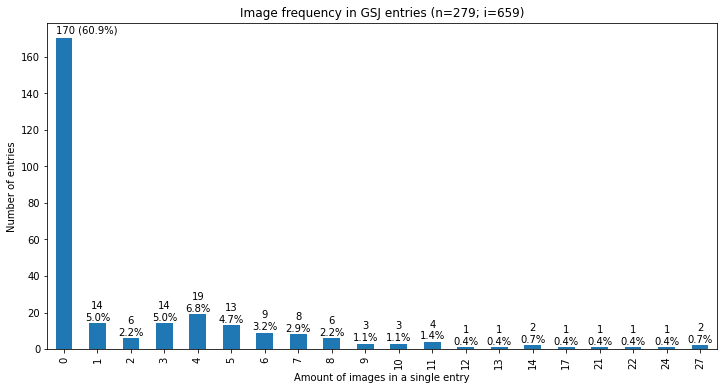

In [12]:
#Sort papers by image count and draw graph 
byImgCount=edf.sort_values(by=['imageCount'])

# print("Mean image count per entry: "+ str(byImgCount.mean()))

byImgCount= byImgCount['imageCount'].value_counts(sort=False)#, normalize=True)
graph=byImgCount.plot(kind='bar', title="Image frequency in GSJ entries (n="+ str(nEntries)+"; i="+str(nImages)+")",
                xlabel="Amount of images in a single entry", ylabel='Number of entries', 
               figsize=(12,6))

#annotate bars with values 
#add percentage only to first bar (no space in the rest)
for i in range(0, len(graph.patches)): 
    p= graph.patches[i]
    count= p.get_height()
    perc= np.round((p.get_height()/nEntries)*100., decimals=1)
    
    label= count
    if i==0: ##add percentage 
        label = str(count)+' ('+ str(perc)+ '%)'
        graph.annotate(label,
                   (p.get_x()+p.get_width()*0.0, p.get_height()),ha='left',
                   va='center',xytext=(0, 8),textcoords='offset points') 
    else: # just number
        label = str(count)+"\n"+str(perc)+"%"
        graph.annotate(label,
                   (p.get_x()+p.get_width()*0.5, p.get_height()+2),ha='center',
                   va='center',xytext=(0, 8),textcoords='offset points') 

#save plot 
if savePlots==True: 
    filename= 'gsc_image_frequency_in_entries.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

image-bearing entries:109
Standard deviation:5.6
Saved graph as: gsc_image_frequency_in_entries_non_zero.png


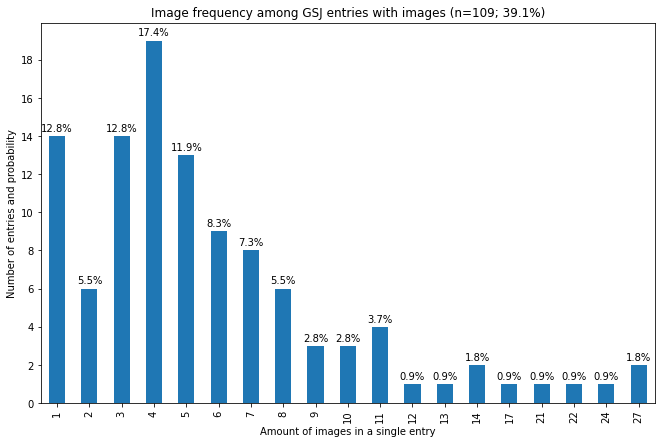

In [13]:
#image likelihood 
#exclude zero 

byImgCount_exclZero= byImgCount.drop(0)
# print(byImgCount_exclZero)
nImageBaringEntries= byImgCount_exclZero.sum()
#percentage over all entries 
ibe_perc=np.round(nImageBaringEntries/nEntries*100., decimals=1)
print("image-bearing entries:"+ str(nImageBaringEntries))

print("Standard deviation:"+ str(percFormat.format(byImgCount_exclZero.std())))

graph= byImgCount_exclZero.plot(kind='bar', 
                                title="Image frequency among GSJ entries with images (n="+ str(nImageBaringEntries)+"; "+ str(ibe_perc)+"%"+")",
                                xlabel="Amount of images in a single entry", 
                                ylabel='Number of entries and probability', 
                                figsize=(11,7), 
                                yticks= range(0,20)[::2])

#annotate bars with values 
#True for adding Percentage, False for just count
for p in graph.patches: 
    count= p.get_height()
    perc= np.round((p.get_height()/nImageBaringEntries)*100., decimals=1)
    graph.annotate('\n'+ str(perc)+ '%',
               (p.get_x()+p.get_width()/2., p.get_height()+0.3),ha='center',
               va='center',xytext=(0, 8),textcoords='offset points')
    

#save plot 
if savePlots==True: 
    filename= 'gsc_image_frequency_in_entries_non_zero.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

### 3.4 Plot HTML Table Frequency in Single Papers

Tables in 36 entries.
Saved graph as: gsc_table_frequency.png


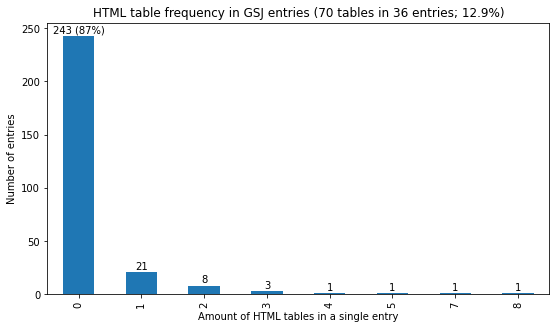

In [14]:
# Plot frequency of Tables in papers 
byTableCount=edf.sort_values(by=['tableCount'])

#sort by table count 
byTableCount= byTableCount['tableCount'].value_counts(sort=False)#, normalize=True)


#exclude zero and get sum 
byTableCount_exclZero= byTableCount.drop(0)
nTableBaringEntries=byTableCount_exclZero.sum()
tableEntryPerc= np.round(nTableBaringEntries/nEntries*100., decimals=1)
print("Tables in "+ str(nTableBaringEntries)+" entries.")

#plot 
gtitle="HTML table frequency in GSJ entries ("+str(nTables)+" tables in "+str(nTableBaringEntries)+" entries; "+str(tableEntryPerc)+"%)"
graph=tableCountPlot= byTableCount.plot(kind='bar', 
                                        title=gtitle, 
                                        xlabel="Amount of HTML tables in a single entry", ylabel='Number of entries', 
                                        figsize=(9,5))

#annotate bars with values, add percentage to first bar 
for i in range(0, len(graph.patches)): 
    p =graph.patches[i]
    label= p.get_height()
    if i==0: #get percentage for first one 
        perc= np.round(label/nEntries*100.)
        label =str(label) +" ("+str(round(perc))+"%)"
    graph.annotate(label,
                   (p.get_x()+p.get_width()/2., p.get_height()),ha='center',
                   va='center',xytext=(0, 6),textcoords='offset points') 
    
#save plot 
if savePlots==True: 
    filename='gsc_table_frequency.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

## Part 4: Create Journal Issues dataframe

In [15]:
import math # for floor function
# Get per issue metrics 
# get mean number of images per issue 
meanImgCount_perIssue=edf.groupby('issueId')['imageCount'].mean()
# get mean by year 
meanImageCount_perYear= edf.groupby('year')['imageCount'].mean()# print(meanImageCount_perYear)
# get image sum per issue 
imageSumPerIssue= edf.groupby('issueId')['imageCount'].sum()
#images per Issue by entry 
imagesPerIssueByEntry= edf.groupby('issueId')['imageCount'].apply(list)
# entries per issue 
# sortByIssue= edf.groupby('issueId')
# entriesPerIssue= sortByIssue['issueId'].value_counts()# edf['issueId'].value_counts()
entriesPerIssue= edf['issueId'].value_counts().sort_index()
# print(entriesPerIssue)

# assemble data  
issue_data={
    'issueKey': dictionaryOfIssues.keys(),
    'issueNumber': dictionaryOfIssues.values(),
    'imageSumPerIssue': imageSumPerIssue, 
    'imagesPerEntry': imagesPerIssueByEntry, 
    'issueImgMean': meanImgCount_perIssue,
    'entrySumPerIssue': entriesPerIssue
}

#assemble data
idf= pd.DataFrame(issue_data)
#create column with entry with max images per issue 
idf['mostImagesIn1Entry']= [max (x) for x in idf['imagesPerEntry']]
# get median 
idf['median']=[np.median(x) for x in idf['imagesPerEntry'].values.tolist() ]#.mean(1) #[x.median() for x in  idf['imagesPerEntry']]

# get friendly labels for plotting 
issueLabels=[]
for index, row in idf.iterrows():
    k= row['issueKey']
    vol=  row['issueKey']%10
    year= 2000+ math.floor(k/100)
    label= str(row['issueNumber'])+"-"+str(year)+"/"+ str(vol)
    issueLabels.append(label)
#     print (str(k)+"-"+ label)

#add column
idf['issueLabel']= issueLabels

#####
#find contribution of top-most contributor
topContributorIssuePerc={}
for i, row in idf.iterrows(): 
    imaxc= row['mostImagesIn1Entry']
    itotc=row['imageSumPerIssue']
    if itotc==0: 
        topContributorIssuePerc[i]=(0)
    else: 
        topContributorIssuePerc[i]=np.round(imaxc/itotc, decimals=2)

#topmost contributors, that account for more than half of issue images
topContribOverHalf=0
toContribAll=0
zeroImageIssues=0

for k in topContributorIssuePerc: 
    val= topContributorIssuePerc[k]
    if val==1:   #for entries that amount to all issue images
        if verbose: 
            print(str(k)+ " - "+ str(val)+" --> top img contrib. accounts for 100%")
        toContribAll+=1
        topContribOverHalf+=1
    elif val>=.5: 
        if verbose: 
            print(str(k)+ " - "+ str(val)+" --> top img contrib. accounts for OVER 50%")
        topContribOverHalf+=1
    elif val==0: 
        if verbose: 
            print(str(k)+ " --> ZERO images in issue")
        zeroImageIssues+=1
    else: 
        if verbose:
            print (str(k)+ " - "+ str(val))
  

print("Number of issues where one entry accounts for more than half of issue images: "+ str(topContribOverHalf))
print("Number of issues where one entry accounts for all issue images: "+ str(toContribAll)) 
print("Number of issues where image count is zero: "+ str(zeroImageIssues)) 

#export dataframe as CSV (subfolder must exist)
if saveDataframes==True: 
    filename= 'gsc_df_issues.csv'
    edf.to_csv(os.path.join(dataExportFolder,filename))
    print("Saved Dataframe as: " + filename)


#print 
idf.head()

Number of issues where one entry accounts for more than half of issue images: 26
Number of issues where one entry accounts for all issue images: 5
Number of issues where image count is zero: 3


,issueKey,issueNumber,imageSumPerIssue,imagesPerEntry,issueImgMean,entrySumPerIssue,mostImagesIn1Entry,median,issueLabel
101,101,1,31,"[4, 27, 0, 0, 0]",6.200000,5,27,0.0,1-2001/1
102,102,2,8,"[0, 1, 0, 7, 0]",1.600000,5,7,0.0,2-2001/2
202,202,3,7,"[3, 0, 4, 0, 0]",1.400000,5,4,0.0,3-2002/2
301,301,4,12,"[0, 0, 0, 0, 10, 1, 1]",1.714286,7,10,0.0,4-2003/1
302,302,5,17,"[0, 1, 0, 14, 2]",3.400000,5,14,1.0,5-2003/2


### 4.1 Plot Image Count per Issue

Saved graph as: gsc_images_per_issue.png


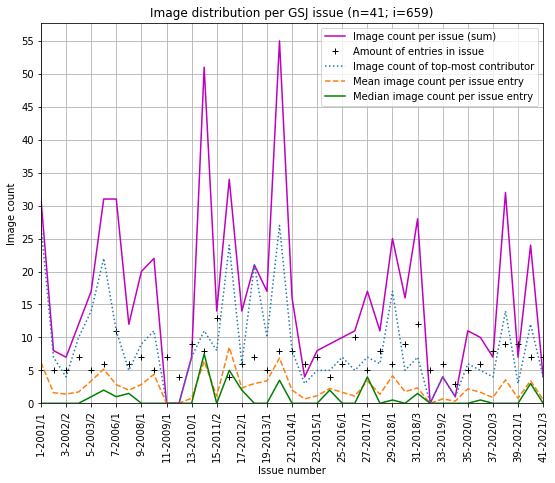

In [16]:
## PLOT 
#set size
plt.figure(figsize=(9,7))
#Plots 
plt.plot(idf['issueLabel'],idf['imageSumPerIssue'],'m', label="Image count per issue (sum)")
#plot entry count 
plt.plot(idf['issueLabel'],idf['entrySumPerIssue'],'+',color='k', label='Amount of entries in issue' )
#top image contributor
plt.plot(idf['issueLabel'],idf['mostImagesIn1Entry'],':', label="Image count of top-most contributor")
# issue image mean 
plt.plot(idf['issueLabel'],idf['issueImgMean'],'--', label="Mean image count per issue entry")
# issue image count median
plt.plot(idf['issueLabel'],idf['median'],'g', label="Median image count per issue entry")


#To plot imagecount minus topmost contributor  
# imageCountNormalized=[]
# for i in range(0, len( idf['imageSumPerIssue'])): 
#     x= idf['imageSumPerIssue'].iloc[i]- idf['max'].iloc[i]
#     imageCountNormalized.append(x)
# idf['imageSumNormalized']= imageCountNormalized
# plt.plot(idf['issueLabel'],idf['imageSumNormalized'], 'r', label="Issue image count excluding top contrib.")

# Axes Ticks 
plt.xticks(idf['issueLabel'][::2] , rotation=90)
plt.yticks(range(0,58)[::5])
plt.xlim(xmin=0, xmax=40) #edit x bounds to elminate gaps left and right 
plt.ylim(ymin=0)
plt.grid(True) # enable background grid 

# Labels  
plt.legend()
plt.title("Image distribution per GSJ issue (n="+str(nIssues)+"; i="+str(nImages)+ ")")
plt.xlabel('Issue number')
plt.ylabel('Image count')

# save plot (needs to be called before plt.shot() in the case of matplotlib)
if savePlots==True: 
    filename='gsc_images_per_issue.png'
    plt.savefig(os.path.join(dataExportFolder,filename),bbox_inches='tight', dpi=300)
    print("Saved graph as: " + filename)

# show figure 
plt.show()

## Part 5: Create Images dataframe, export CSV and manually annotate image types 

### 5.1 Create Images Dataframe
(a function to download all images locally is provided below in the *Annex* section)

1. Create Dataframe containing all images (one row per image)
2. Export as CSV spreadsheed 
    - that can be opened with various Spreadsheet editors (for example also Excell: Data/From Text/CSV) to manually edit.
    - after annotation in the 'image_annotation' column, 'Save As' CSV, and take note of the separator between values (in CSV usually is ',')

In [17]:
# Create a table for manual annotation of images 
l_index=[]
l_paperIndex=[]
l_paperUrl=[] 
l_imageUrl=[]
l_paperTitle=[] #not needed just to make the table easier to read, and to cross check 

for index, row in edf.iterrows(): 
    for imgUrl in row['imageUrls']: 
        l_paperIndex.append(index)# paper index
        l_imageUrl.append(imgUrl)# name/url of image
        l_paperUrl.append (row['url'])# paper url
        l_paperTitle.append(row['title'])# paper title
            
#create dataframe 
imageDF= pd.DataFrame({
    "paper_index": l_paperIndex, 
    "paper_title": l_paperTitle, 
    "paper_url": l_paperUrl, 
    "image_url": l_imageUrl, 
    "image_annotation": [""]*len(l_paperIndex)# Add column to manually annotate 
})


#for preview 
imageDF.head()

,paper_index,paper_title,paper_url,image_url,image_annotation
0,0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,eskelinen1.gif,
1,0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,eskelinen2.gif,
2,0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,eskelinen3.gif,
3,0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,eskelinen4.gif,
4,1,Is It Possible to Build Dramatically - Compel...,https://www.gamestudies.org/0101/bringsjord/,2_files/img3.gif,


### 5.2 Export CSV for manual annotation (off)
- The following exports a CSV file that lists all images for manual annotation (currently exporting such a file file is disabled see `exportImagesCSV` flag).  
- Each image was labelled manually according to its type, in a new column titled `image_annotation` 

In [18]:
# Export image list to CSV 
exportImagesCSV= False # <--- change value to True to save a CSV list of all images
i_filename='CSV-GSJ image list.csv'
#export CSV list of all images 
if exportImagesCSV: 
    imageDF.to_csv(os.path.join(dataExportFolder,i_filename))
    print('Saved Images Dataframe as: ' + i_filename)

### 5.3 Load table after manual annotation and organize labels

Load the CSV file which includes image annotations, to list unique types and their frequency. 

- The CSV file with image annotations used for this inquiry is included. 
- For making a new one,  make note of value separator, usually that is a comma (`,`). In this case I edited and exported using Excell which used a semicolon (`;`) as separator. 

In [19]:
#Reload previous CSV and create a dataframe 
#File used for investigation supplied as "GSJ image list with manual classification annotations.csv"
#Rename, load and reference name below to use
csvFileToLoad= "data_import/CSV-GSJ image classification list.csv"
annotatedImages_df= pd.read_csv(csvFileToLoad, sep=';')# export to CSV from Excell uses <semicolon> separator 

#get all unique labels 
imageTypes=[]
for index, row in annotatedImages_df.iterrows(): 
    imageType= row['image_annotation'].lower().strip().title()# get annotation in lower case
    #add to list of unique values 
    if not imageType in imageTypes: 
        imageTypes.append(imageType)
    #rewrite image type as uniform
    annotatedImages_df.loc[index, 'image_annotation']= imageType

print("Unique image classes:")
print(imageTypes)


# To view dataframe
# annotatedImages_df.head()


Unique image classes:
['Diagram', 'Table', 'Film Screenshot', 'Algorithm', 'Game Screenshot', 'Text', 'Glyph', 'Picture', 'Graph', 'Music Score', 'Screenshot', 'Photo', 'Illustration', 'Animated Gif', 'Translation Text', 'Text - Illustration']


### 5.4 Plot Classification of image types

Saved graph as: gsc_image_types.png


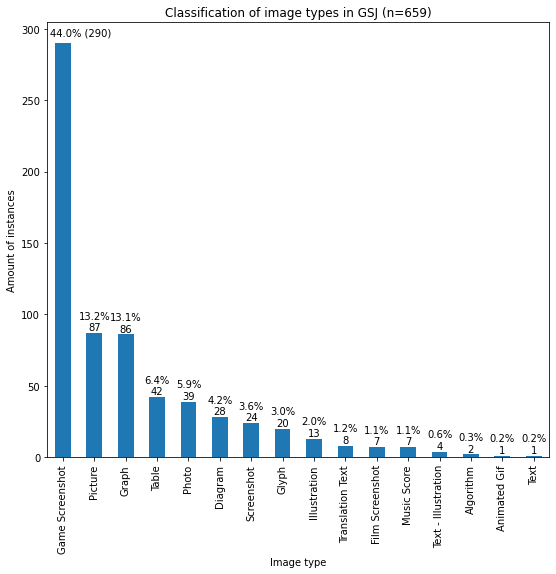

In [20]:
#sort by values
sortedByAnnotation= annotatedImages_df.sort_values(by=['image_annotation'])
# Count the occurrence of unque elements and store in a variable which is series type
# with index ('keys') and count. These can be plotted 
valueCounts= sortedByAnnotation['image_annotation'].value_counts(sort=True)

#plot 
graph= valueCounts.plot(kind='bar', title= "Classification of image types in GSJ (n="+ str(valueCounts.sum())+")",
                 xlabel='Image type', ylabel='Amount of instances',
                figsize=(9,8))

#annotate bars with values 
#True for Percentage, False for count
annotatePercent=True

for i in range(0, len(graph.patches)): 
    p= graph.patches[i]

    count= p.get_height()
    lbl=count #label 
    if annotatePercent== True:
        perc=np.round((count/nImages)*100.,decimals=1)
        if i==0: 
            lbl= str(perc)+'%'+ ' ('+ str(count)+')'
            graph.annotate(lbl,
                   (p.get_x()-p.get_width()/2.+.1, p.get_height()),ha='left',
                   va='center',xytext=(0, 10),textcoords='offset points') 
        else: 
            lbl= str(perc)+'%'+ '\n'+ str(count)
            graph.annotate(lbl,
                   (p.get_x()+p.get_width()/2., p.get_height()+1.0),ha='center',
                   va='center',xytext=(0, 10),textcoords='offset points') 

#save plot 
if savePlots==True: 
    filename= 'gsc_image_types.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

### 5.5 Append annotation information into Entries Dataframe (different media types and amount of differnet media types) & Plot combination of different media in single entries

In [21]:
eadf=edf# create a copy of the dataframe 

mediaDict={}#create new dictionary to add media types per entry (entry is dict key, media types are values)

#iterate through media, and add type to entry
for index, row in annotatedImages_df.iterrows(): 
    pt= row['paper_title']#paper title (use as dictionary key)
    mediaType= row['image_annotation']#image type
    if (pt in mediaDict): # if paper in dictionary 
        if (mediaType not in mediaDict[pt]): # if media type not already there 
            mediaDict[pt].append(mediaType)
    else: 
        mediaDict[pt]= [mediaType]

mediaTypes= [[] for _ in range(nEntries)] #list of lists, len=nEntries, each with empty array to fit mediaTypes
mediaTypesCount= [0]*nEntries #count of media types

#iterate through entries dataframe, and gather media types from dictionary, and from HTML tables 
for index, row in eadf.iterrows(): 
    pt= row ['title']
    entryMedia=[]
    if (pt in mediaDict): # if entry title is in dictionary, then get media type values 
        entryMedia = mediaDict[pt]
    if (row['tableCount']>0): #if entry has HTML tables, then add HTML table type as well  
        entryMedia.append("HTML Table")

    mediaTypes[index]= sorted(entryMedia)# save to gmedia types to array
    mediaTypesCount[index]= len (entryMedia)# add number of media types to array  
    

#save media types in 'media_types' column 
eadf['media_types']= mediaTypes
#save media type count in 'media_types_count' as new column 
eadf['media_types_count']= mediaTypesCount

#to check 
# print(mediaTypes)
eadf.head()

,title,url,imageUrls,imageCount,tableCount,issueId,year,issueNumber,media_types,media_types_count
entryIndex,,,,,,,,,,
0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,"[eskelinen1.gif, eskelinen2.gif, eskelinen3.gi...",4,0,101,2001,1,"[Diagram, Table]",2
1,Is It Possible to Build Dramatically - Compel...,https://www.gamestudies.org/0101/bringsjord/,"[2_files/img3.gif, 3_files/img4.gif, 6_files/i...",27,1,101,2001,1,"[Algorithm, Diagram, Film Screenshot, Game Scr...",8
2,The Sims: Grandmothers are cooler than trolls,https://www.gamestudies.org/0101/frasca/,[],0,0,101,2001,1,[],0
3,The repeatedly lost art of - studying games,https://www.gamestudies.org/0101/juul-review/,[],0,0,101,2001,1,[],0
4,Beyond Myth and Metaphor*,https://www.gamestudies.org/0101/ryan/,[],0,0,101,2001,1,[],0


Saved graph as: gsc_media_types.png


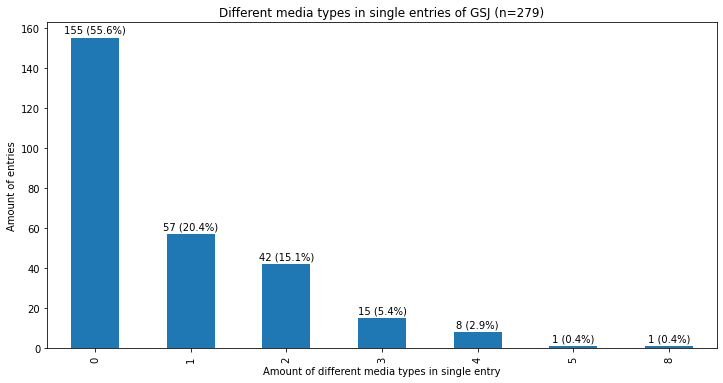

In [22]:
# PLOT BY COUNT 
sortedByMediaTypeCount=  eadf.sort_values(by=['media_types_count'])
# sortedByMediaTypeCount
mediaTypesCountValueCounts= sortedByMediaTypeCount['media_types_count'].value_counts(sort=False)
#plot
graph= mediaTypesCountValueCounts.plot(kind='bar', figsize= (12,6), 
                                       title= 'Different media types in single entries of GSJ (n='+ str(nEntries)+")",
                                       xlabel="Amount of different media types in single entry", ylabel='Amount of entries')

#annotate bars 
for p in graph.patches:
    value= p.get_height()
    perc= np.round((value/nEntries)*100., decimals=1)
    graph.annotate(str(value)+" ("+ str(perc)+"%)",
                   (p.get_x()+p.get_width()/2., p.get_height()),ha='center',
                   va='center',xytext=(0, 8),textcoords='offset points')

#save plot 
if savePlots==True: 
    filename='gsc_media_types.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

### 5.6 Exlude zero media count & plot percentage distribution 

Entries with media:124
Saved graph as: gsc_media_types_non_zero.png


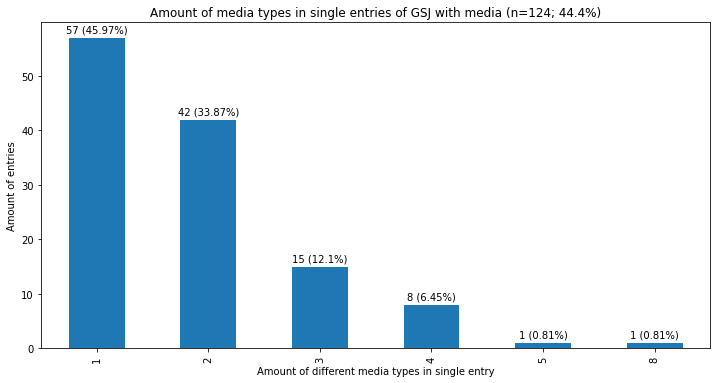

In [23]:
#drop entries with 0 MediaTypeCount 
mediaTypesVCount_excludingZero=mediaTypesCountValueCounts.drop(0)
# print(mediaTypesVCount_excludingZero)

nEntriesWithMedia= mediaTypesVCount_excludingZero.sum()
print("Entries with media:"+str(nEntriesWithMedia))
# get percentage over all entries 
ewm_perc=np.round(nEntriesWithMedia/nEntries*100., decimals=1)

gtitle='Amount of media types in single entries of GSJ with media (n='+ str(nEntriesWithMedia)+"; "+str(ewm_perc)+"%)"
                                    
graph=mediaTypesVCount_excludingZero.plot(kind='bar', figsize= (12,6), 
                                       title= gtitle,
                                          xlabel="Amount of different media types in single entry", 
                                        ylabel='Amount of entries')

#annotate bars with percentages 
for p in graph.patches:
    value= p.get_height()
    perc = np.round((value/nEntriesWithMedia)*100, decimals=2)
    graph.annotate(str(value)+" ("+str(perc)+"%)",
                   (p.get_x()+p.get_width()/2., p.get_height()),ha='center',
                   va='center',xytext=(0, 8),textcoords='offset points')
    
#save plot 
if savePlots==True: 
    filename='gsc_media_types_non_zero.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

### 5.7 Plot different media combinations 

Saved graph as: gsc_media_types_detailed.png


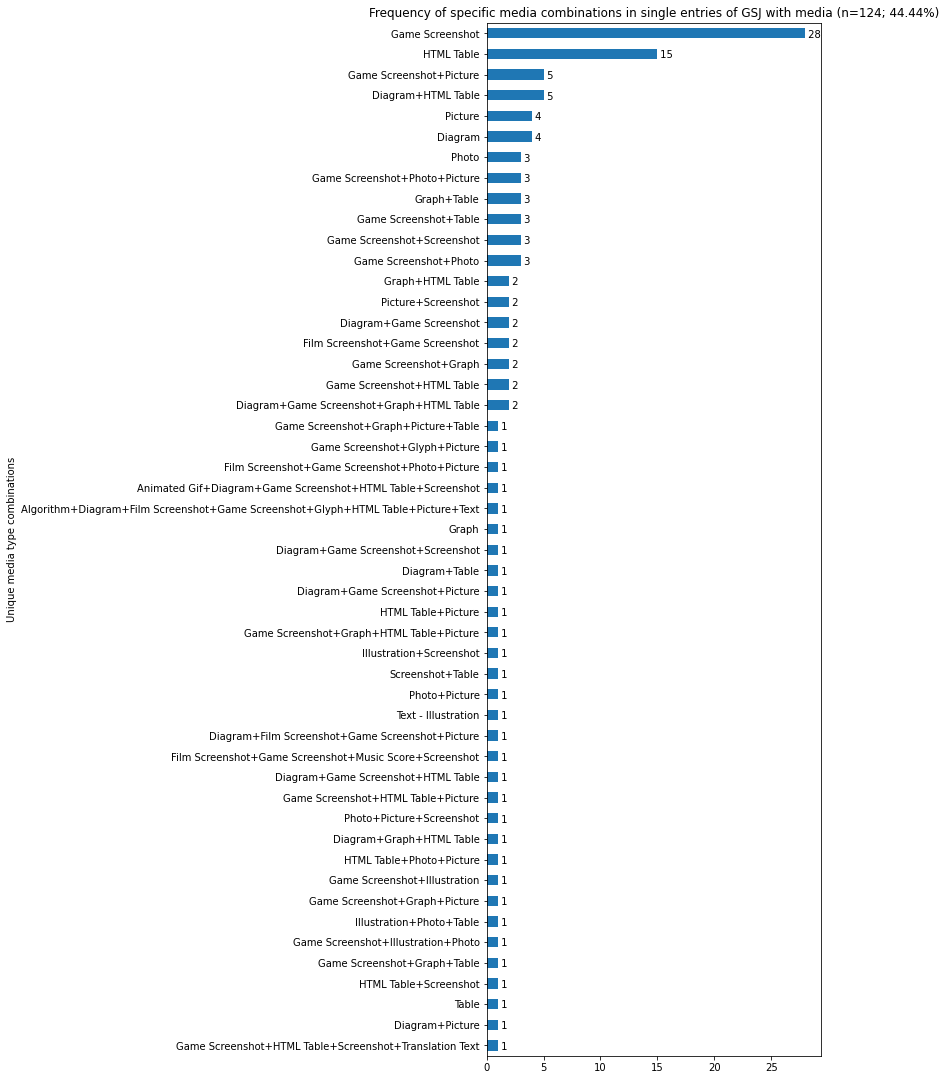

In [24]:
# sort and plot 
sortedByMediaTypes= eadf.sort_values(by=['media_types'])
# sortedByMediaTypes
mediaTypeValueCounts= sortedByMediaTypes['media_types'].value_counts(sort=True)

#exclude zero 
mediaTypeValueCounts_exZero=mediaTypeValueCounts[1::]


#get friendly labels 
friendlyLabels=[]
for keysets in mediaTypeValueCounts_exZero.keys(): 
    label=""
    for k in keysets: 
        if label=="": #for the first one 
            label=k
        else: 
            label+="+"+k #for any other prepend "+"
    friendlyLabels.append(label)     
    
#plot 
perc= np.round(nEntriesWithMedia/nEntries*100.0, decimals=2)
gtitle= 'Frequency of specific media combinations in single entries of GSJ with media (n='+ str(nEntriesWithMedia)+"; "+str(perc)+"%)"
graph=mediaTypeValueCounts_exZero.plot.barh( figsize= (6,19),
                                            title= gtitle,
                                            xlabel='Unique media type combinations', 
                                            ylabel='Amount of entries')

#set friendlier labels 
graph.set_yticklabels(friendlyLabels)

#sort descending 
graph.invert_yaxis()
#annotate graph 
for patch in graph.patches:
    graph.text(
        patch.get_width() + 0.0, 
        patch.get_y() + 0.3,
        " {:,}".format(patch.get_width()), 
        fontsize=10, va='center'
    )
    
#save plot 
if savePlots==True: 
    filename= 'gsc_media_types_detailed.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

### 5.8 Check presence of media types in different combinations 

Saved graph as: gsc_media_types_in_combinations.png


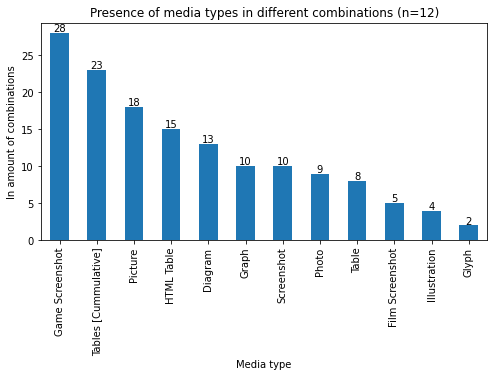

In [25]:
#get the frequency of media types in combinations 
mediaTypeInCombinations={}
combinations= mediaTypeValueCounts_exZero.keys()
# print(combinations)
for comb in combinations: 
    for combType in comb: 
        if combType in mediaTypeInCombinations: 
            mediaTypeInCombinations[combType]+=1
        else: 
            mediaTypeInCombinations[combType]=1
#             print (combType)

singleMedia=[]
for k in mediaTypeInCombinations: 
    if mediaTypeInCombinations[k]==1: 
        singleMedia.append(k)
        
#single media to exclude 
# print(singleMedia)
#remove single media 
for e in singleMedia: 
    del mediaTypeInCombinations[e]

mediaTypeInCombinations["Tables [Cummulative]"]= mediaTypeInCombinations["HTML Table"]+ mediaTypeInCombinations["Table"]

nMediaCombined= len(mediaTypeInCombinations)
#create dataframe
mediaCombination_df= pd.DataFrame({"mediaType" : mediaTypeInCombinations.keys(),
                                  "in_combinations":mediaTypeInCombinations.values()} )

#sort descending 
mcSorted=mediaCombination_df.sort_values(by=['in_combinations'], inplace=True, ascending=False)
#plot 
graph=mediaCombination_df.plot.bar(title="Presence of media types in different combinations (n="+str(nMediaCombined)+")",xlabel="Media type", ylabel="In amount of combinations",
                                  figsize= (8,4), 
                                  legend=False)#, xticks=mediaCombination_df['mediaType'] )
graph.set_xticklabels(mediaCombination_df.mediaType)


#annotate barts with percentages 
for p in graph.patches:
    value= p.get_height()
#     perc = np.round((value/nEntriesWithMedia)*100, decimals=2)
    graph.annotate(str(value),
                   (p.get_x()+p.get_width()/2., p.get_height()-.5),ha='center',
                   va='center',xytext=(0, 8),textcoords='offset points')


#save plot 
if savePlots==True: 
    filename= 'gsc_media_types_in_combinations.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

## Part 6: Scan entries for hyperlinks & video links; plot data
### 6.1 Scan all entries for hyperlinks

In [26]:
# kept separate from the primary scrape to avoid delays, and to keep things more agile and modular

allEntryLinks={} #dictionary to hold all href data per entry 

verbose= False

print("Scanning entries for Hyperlinks. Wait for confirmation message.. (~1min)")
#scanning could also check for linked files. 
#Besides enlarged images a known case is '.wav' files, submited and uploaded similarly as figures

# loop through entries and scan for hyperlinks; add to array
linkCount=0
for index, row in edf.iterrows(): 
    #print every 20 
    if index>0 and index % 20==0: 
        print("..processed "+ str(index)+" of "+ str(nEntries)+" entries..") 
    url=row['url']
    
    #Get all Hrefs per entry 
    links= getLinksInPage(url)
    linkCount+= len(links)
    #save to array 
    allEntryLinks[index]= links

print("Scan Finished. Found "+ str(linkCount)+ " hyperlinks.")

Scanning entries for Hyperlinks. Wait for confirmation message.. (~1min)
..processed 20 of 279 entries..
..processed 40 of 279 entries..
..processed 60 of 279 entries..
..processed 80 of 279 entries..
..processed 100 of 279 entries..
..processed 120 of 279 entries..
..processed 140 of 279 entries..
..processed 160 of 279 entries..
..processed 180 of 279 entries..
..processed 200 of 279 entries..
..processed 220 of 279 entries..
..processed 240 of 279 entries..
..processed 260 of 279 entries..
Scan Finished. Found 6414 hyperlinks.


### 6.2 Filter hyperlinks
Filter for valid hyperlinks. 

The conditionals below: 
- ignore various types of invalid and null links;
- ignore internal or relative links
- ignore email hyperlinks (`mailto:...`); 
- ignore links to the journal's archive page, about page, journal issues,and RSS;
- gathers separately links to JPG, PNG, GIF, WAV, MP3 (0) files. 

In [27]:
## FILTER Hyperlinks to get valid entries (as much as possible )
#if a URL starts with the following, skip 
IGNORE_LINKS=['http://validator.w3.org',
             'http://www.gamestudies.org/about', 
             'http://gamestudies.org/about',
            'http://gamestudies.org/rss',
             'https://gamestudies.org/rss']
#ignore these precise URLs  
IGNORE_PRECISE=['http://gamestudies.org', 'http://www.gamestudies.org', '/about.html', '../about.html']
GAMESTUDIES_ROOT=['http://gamestudies.org', 'https://gamestudies.org', 'http://www.gamestudies.org', 'https://www.gamestudies.org']
DOI_FORMAT='doi:'
DOI_URL='https://doi.org/'

hrefs= [[] for _ in range(nEntries)] # list of hyperlinks per entry
videoRefs=[0]*nEntries # count of video references per entry

brokenLinks=[]#list of broken links 

mediaLinks={'jpg':0, 'png':0, 'gif':0,'wav':0, 'mp3':0}
internalLinks=0

# loop through array of Hyperlinks by Entry
for entryIndexKey in allEntryLinks: 
    #loop through entry links 
    for link in allEntryLinks[entryIndexKey]: 
        #skip if url is None 
        if link is None :
#             if verbose: 
#                 print("Skip null link")
            continue
        link= link.strip()         #remove white spaces
        ##
        if link=='/': # skip links that are just '/'
#             if verbose: 
#                 print("Skip '/'")
            continue
            ##
        if link.startswith('mailto'):  #skip emails 
#             if verbose: 
#                 print("Skip email link: "+ link)
            continue
            ##
        if link.startswith('#'): #skip internal/relative links to footnote/endnote
            internalLinks+=1
            if verbose: print("Skip internal/relative link: "+ link)
            continue
        if  len(link.split('.'))<2: 
            if verbose: print("Invalid or internal URL:"+ link)
            internalLinks+=1
            continue
            ##
        if (DOI_FORMAT in link): # Get DOI links formatted different
            colonIndex= link.index(DOI_FORMAT)
            doiLink= link[colonIndex+ len(DOI_FORMAT):]
            doiLink= DOI_URL+doiLink
            hrefs[entryIndexKey].append(doiLink)
            if verbose: print("Reformatted DOI as: "+doiLink)
            continue

        if link.startswith('www.'): #prepend HTTP in URLs that dont have that 
            link="http://"+ link
            if verbose: print('http:// Prepend: ' + link)
        ##
        #skip ignore cases
        if any( link.startswith(ignoreLink) for ignoreLink in IGNORE_LINKS ): 
#             if verbose: 
#                 print("Skip URL by start pattern from IGNORE_LINKS: "+ link)
            continue
        #ignore cases 
        if any (link == ignore for ignore in IGNORE_PRECISE): 
#             if verbose: 
#                 print("Skip link from IGNORE_PRECISE: "+ link)
            continue
                
        #fix a few GSJ URLs that need 'http://www.'
        if link.startswith('gamestudies.org/'): 
            link= "http://www."+ link
        #this gets rid of a lot of remaining invalid links 
        if not is_valid(link): 
            brokenLinks.append(link)
            if verbose: 
                print ("Skip broken/invalid/internal link: "+ link)
            continue 
#         verbose=False
        
        ### FILTER GAMESTUDIES.ORG links 
        # match URL start 
        if any( link.startswith(gsRoot) for gsRoot in GAMESTUDIES_ROOT ): 
            # LOOK FOR LINKS TO FILES (WAV, MP3,JPG, PNG GIF)
            if any(link.endswith(wavFile) for wavFile in ['.wav', '.WAV']): 
                mediaLinks['wav']+=1
#                 if verbose: print ("WAV link:"+ link)
                continue
            elif any (link.endswith(mp3File) for mp3File in ['.mp3', '.MP3']):
                mediaLinks['mp3']+=1
#                 if verbose: print("MP3 link:"+link)
                continue 
            elif any (link.endswith(jpgFile) for jpgFile in ['.jpg', '.jpeg','.JPG', '.JPEG']):
                mediaLinks['jpg']+=1
#                 if verbose: print ("JPG link:"+ link)
                continue
            elif any (link.endswith(pngFile) for pngFile in ['.png', '.PNG']):
                mediaLinks['png']+=1
#                 if verbose: print("PNG link:"+link)
                continue   
            elif any (link.endswith(gifFile) for gifFile in ['.gif', '.GIF']):
                mediaLinks['gif']+=1
#                 if verbose: print("GIF link:"+link)
                continue 
            # split URL parts to match links to Archive or About pages 
            split = link.split('/')
            #skip GSJ about link
            if split[-1]=='about' or split[-2]=='about': 
#                 if verbose: 
#                     print ("Skip about page: "+ link)
                continue
            #skip GSJ archive link
            if split[-1]=='archive' or split[-2]=='archive': 
#                 if verbose:
#                     print ("Skip archive page: "+ link)
                continue
            #skip link to GSJ issue  
            if len(split)==4 or (len(split)==5 and split[4]==''): 
#                 if verbose: 
#                     print("Skip link to journal issue: "+ link)
                continue
            #skip internal footnotes/endnotes 
            if split[-1].startswith('#'): 
                internalLinks+=1
                if verbose: 
                    print("Skip internal #link: "+ link)
                continue
            #skip links to 'issue art' or 'articleimages' (from different archiving conventions)
            if len(split)>3 and split[3]=='articleimages': 
                if verbose: 
                    print ("Skip article images: "+ link)
                continue
            if len(split)>4 and split[4]=='issue-art': 
                if verbose: 
                    print ("Skip issue art: "+ link)
                continue 
        # if all checks passed then add to list 
        hrefs[entryIndexKey].append(link)

# get link sum 
sumOfLinks=0
for entryIndex in range(0, len(hrefs)): 
    entryLinks= len(hrefs[entryIndex])
    sumOfLinks+=entryLinks
print ("Sum of links: "+ str(sumOfLinks))
# print links to media 
print("Links to files:")
for ml in mediaLinks: 
    print ('\t'+ml.upper()+ " links: "+ str(mediaLinks[ml]))
print("Internal/relative links: "+str(internalLinks))
   
#print broken link count -- mostly relative/internal links, links to images,
#and urls without www or http prefix 
print("Broken/internal hyperlinks: "+ str(len(brokenLinks))+" (see \'brokenLinks\' array).")
# Test: print broken links with line below 
#print(brokenLinks)
# Examples of problematic links (spaces inbetween the url, or connected with text, or characters missing):
# - (appended with text) 'Onlinehttp://blogs.suntimes.com/ebert/2010/07/okay_kids_play_on_my_lawn.html'
# - (missing 'h') 'ttp://www.wowhead.com/npc=23616#'
# - (contains space) 'http://www.gamasutra.com/ php-bin/news_index.php?story=19104'
# - (contains space) 'http://www.washingtontimes.com/news/2005/jan/19/20050119- 120236-9054r/?page=all'

#Add column 'hrefs' to dataframe
edf['hrefs']=hrefs
edf.head()
# note: Have checked for self-referential links in entries

Sum of links: 2246
Links to files:
	JPG links: 63
	PNG links: 39
	GIF links: 1
	WAV links: 19
	MP3 links: 0
Internal/relative links: 2189
Broken/internal hyperlinks: 58 (see 'brokenLinks' array).


,title,url,imageUrls,imageCount,tableCount,issueId,year,issueNumber,media_types,media_types_count,hrefs
entryIndex,,,,,,,,,,,
0,The Gaming Situation,https://www.gamestudies.org/0101/eskelinen/,"[eskelinen1.gif, eskelinen2.gif, eskelinen3.gi...",4,0,101,2001,1,"[Diagram, Table]",2,[http://www.dichtung-digital.de/2001/05/29-Esk...
1,Is It Possible to Build Dramatically - Compel...,https://www.gamestudies.org/0101/bringsjord/,"[2_files/img3.gif, 3_files/img4.gif, 6_files/i...",27,1,101,2001,1,"[Algorithm, Diagram, Film Screenshot, Game Scr...",8,[http://diac.it-c.dk/cgdt]
2,The Sims: Grandmothers are cooler than trolls,https://www.gamestudies.org/0101/frasca/,[],0,0,101,2001,1,[],0,"[http://www.babyz.net/, http://www.salon.com/t..."
3,The repeatedly lost art of - studying games,https://www.gamestudies.org/0101/juul-review/,[],0,0,101,2001,1,[],0,"[http://www.jesperjuul.dk/en, http://diac.it-c..."
4,Beyond Myth and Metaphor*,https://www.gamestudies.org/0101/ryan/,[],0,0,101,2001,1,[],0,[http://diac.it-c.dk/cgdt]


### 6.3 Scan for links to videos and video link frequency in entries 
Scan URLs that match Youtube, Twitch, Vimeo, etc. and plot graph with their frequencies in entries

Total video references found: 93
Video bearing entries:29
Video bearing entries percentage:10.39
Saved graph as: gsc_videolink_frequency.png


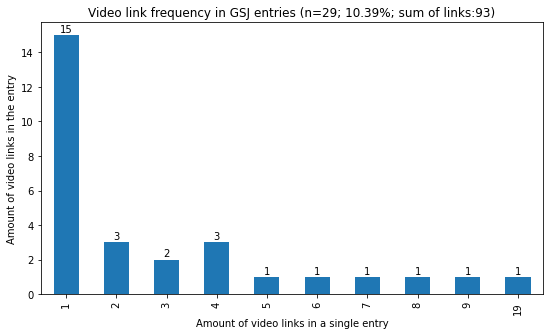

In [28]:
#video streaming sites 
VIDEO_STREAMING_SITES= ['youtu.be', 'youtube.com','vimeo.com','dailymotion.com', 'twitch.tv']

#loop through valid links and look for video streaming sites 
for entryIndex in range(0, len(hrefs)): 
    for link in hrefs[entryIndex]: 
        if any (site in link for site in VIDEO_STREAMING_SITES): 
            if verbose: 
                print("Video link in entry "+ str(entryIndex)+" : "+ link)
            videoRefs[entryIndex]+=1

#Add column 'videoRefs' to dataframe
edf['videoRefs']= videoRefs
nVideoRefs= edf['videoRefs'].sum()
print("Total video references found: "+ str(nVideoRefs))

# Plot frequency of Video Links in Entries 
#sort, and count values
byVideoCount=edf.sort_values(by=['videoRefs'])
byVideoCountValueCounts= byVideoCount['videoRefs'].value_counts(sort=False)
#exclude zero values
byVideoCountValueCounts= byVideoCountValueCounts.drop(0)

# print(byVideoCountValueCounts)
nVideoBearingEntries= byVideoCountValueCounts.sum()
print("Video bearing entries:"+str(nVideoBearingEntries) )
videoBearningEntriesPerc= np.round(nVideoBearingEntries/nEntries*100., decimals=2)
print("Video bearing entries percentage:"+str(videoBearningEntriesPerc) )

#plot 
graph= byVideoCountValueCounts.plot(kind='bar', 
                                    title="Video link frequency in GSJ entries (n="+str(nVideoBearingEntries)+"; "+str(videoBearningEntriesPerc)+"%; sum of links:"+str(nVideoRefs)+")",
                 xlabel="Amount of video links in a single entry", 
                 ylabel="Amount of video links in the entry", 
                                    label='Number of entries', 
                                    figsize=(9,5))

#annotate bars with values 
for p in graph.patches:
    count= p.get_height()
    graph.annotate(count,
                   (p.get_x()+p.get_width()/2., p.get_height()),ha='center',
                   va='center',xytext=(0, 6),textcoords='offset points') 

#save plot 
if savePlots==True: 
    filename='gsc_videolink_frequency.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)

### 6.4 Strip URLs to their root components and list most popular websites 
- Get base/root URLs 
- Get number of occurences per individual entries to base URLs, count occurences, and save instances
- Label adjustments 
    - [DOI] (includes both 'doi.org' and 'doi:')
    - [Loading Journal] ('journals.sfu.ca')
    - jesperjuul.net (includes jesperjuul.dk)

In [29]:
keepUrlPrefix=False # flag for using base URL as in site.com, or to account for subdomains 

#remove http, https, www. and return root url 
def get_strippedUrl(url, keepPrefix=False): 
#     if url.startswith("file"): print("FILE:"+ url)
    url=url.lower()
    #remove https
    skip= 'https://'
    if url.startswith(skip): 
        url= url[len(skip)::]
    #remove http
    skip= 'http://'
    if url.startswith(skip): 
        url= url[len(skip)::]
    #remove www.
    skip= 'www.'
    if url.startswith(skip): 
        url= url[len(skip)::]
        
    #split by '/'
    result= url.split('/')[0]
    #return first part 
    if keepPrefix==True: 
        return result 
    else: # or check for root url
        dotSplit= result.split('.')
        if len(dotSplit)>2  and len(dotSplit[-1])>2: #and not dotSplit[-2] in ['blogspot','wordpress']: 
            result=dotSplit[-2]+'.'+dotSplit[-1]
            #for the case of 2 digit urls, for example uk
            if dotSplit[-1]=='uk' and len(dotSplit)>=3: 
                result= dotSplit[-3]+'.'+result
        return result
    


#dict of common links 
commonLinkInstances={} # instances of a base URL
commonLinkEntries={} # entries referencing a particular base URL  
commonLinkCases={} # specific instances of a base URL

#create dictionaries 
for index, entry in edf.iterrows(): 
    for href in entry['hrefs']: 
        #strip url to its root 
        strippedUrl= get_strippedUrl(href, keepUrlPrefix)
#         print(strippedUrl+" "+ href)
        #merge youtube.com and youtu.be 
        if (strippedUrl=='jesperjuul.dk'):  #same website
            strippedUrl='jesperjuul.net'
        if strippedUrl=='youtu.be': 
            strippedUrl='youtube.com'
        if strippedUrl=='web.archive.org': 
            strippedUrl='archive.org'
        #merge doi with e.g. dx.doi.org
        if strippedUrl.endswith('doi.org'): 
            strippedUrl= '[DOI]'
        #all entries in 'journals.sfu.ca' are from the Loading journal 
        if strippedUrl=='journals.sfu.ca': 
            strippedUrl='[Loading Journal]'
        
        #if it exists add index / iterate 
        if strippedUrl in commonLinkInstances: 
            commonLinkInstances[strippedUrl]+=1 ##iterate counter
            commonLinkCases[strippedUrl].append(href)#add href url into cases 
            if  not index in commonLinkEntries[strippedUrl]: ## add entry index if not there
                commonLinkEntries[strippedUrl].append(index) 

        else: #otherwise create first entry 
            commonLinkEntries[strippedUrl]=[index] # start array
            commonLinkInstances[strippedUrl]=1 #set counter to one 
            commonLinkCases[strippedUrl]=[href] # specific URL instance            

print ("Unique websites: "+ str(len(commonLinkCases)))

# Test: print URLs found in many entries, with total instances 
# for key in commonLinkCases: 
#     uniqueEntries = (len(commonLinkEntries[key]))
#     urlInstances= len(commonLinkCases[key])
#     if (uniqueEntries<=5): 
#         print (' - '+ key+ " | "+ str(uniqueEntries)+"  unique entries | "+ str(urlInstances)+" total instances." )

Unique websites: 865


### 6.5 Plot common websites 
- Plot common base URLs, occuring in individual entries more than 5 times (`websiteFrequencyToPlot`)
- Group and color base URLs according to website type

Saved graph as: gsc_popular_websites_colored.png


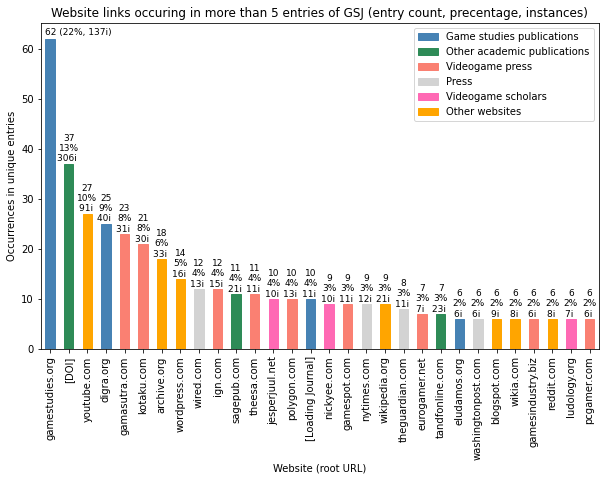

In [36]:
#filter data to get websites appearaing in more than X different entries 
websiteFrequencyToPlot=5
colorGraph=True # toggle to color bar graphs or not 

#assemble data: common base URLS in different entries, their count and instances
hrefData={}
hrefsIgnored= {}
hrefInstances={}
for k in commonLinkEntries: 
    # if a page is mentioned in more than X amount of in different entries 
    linkInXDifferentEntries= len(commonLinkEntries[k])
    #if larger than filter 
    if linkInXDifferentEntries>websiteFrequencyToPlot: 
        #print metrics 
#         print(k+ " is referened in " +str(len(commonLinkEntries[k]))+" different articles, "+str(commonLinkInstances[k])+ " times overall" )
        hrefData[k]=len(commonLinkEntries[k])
        hrefInstances[k]= commonLinkInstances[k]
    else: 
        hrefsIgnored[k]= len(commonLinkEntries[k])

#TEST 
#print filtered cases 
# print(hrefData)
#print what is ignored from this filtering
# print(hrefsIgnored)

#make dictionary 
href_data= {"website": hrefData.keys(), 
                       "occurences": hrefData.values()}
#create dataframe
href_df= pd.DataFrame(href_data)
# sort by occurences
href_sorted= href_df.sort_values(by=['occurences'],ascending=False)

# COLOR GROUPING
# Website groups
gameStudies=  ['gamestudies.org', 'digra.org', 'eludamos.org','[Loading Journal]']
generalAcademic = ['[DOI]', 'tandfonline.com', 'acm.org', 'sagepub.com', 'wiley.com', 'journal.media-culture.org.au']
press = ['theguardian.com','wired.com', 'nytimes.com', 'washingtonpost.com', 'forbes.com','theverge.com', 'vice.com','slate.com', 'suntimes.com', 'telegraph.co.uk', 'engadget.com']
gamePress = ['gamasutra.com', 'kotaku.com', 'ign.com','polygon.com','pcgamer.com','eurogamer.net', 'gamespot.com','gamesindustry.biz', 'theesa.com','joystiq.com', 'rockpapershotgun.com', 'escapistmagazine.com']
scholars = ['ludology.org', 'jesperjuul.net', 'nickyee.com', 'costik.com', 'bogost.com']
# symmetrical arrays of website groups and corresponding colors 
websiteDict={
    'Game studies publications':  gameStudies, 
    'Other academic publications': generalAcademic,
    'Videogame press' :  gamePress,
    'Press': press,
    'Videogame scholars':scholars,
    'Other websites': [] # this is to remain empty, and will match the category/color to what isn't elsewhere 
}
colorDict={
    'Game studies publications':  'steelblue',
    'Other academic publications':'seagreen',
    'Videogame press' :'salmon',
    'Press': 'lightgrey',
    'Videogame scholars':'hotpink', #'wheat',#'lightblue',# 
    'Other websites': 'orange' 
}

# Get labels 
graphLabels=[]
patchCounter=0
colors=[]
for index, row in href_sorted.iterrows():
    ws= row['website']
    inEntries = row['occurences']
    inEntriesPerc= str(round(inEntries/nEntries*100) )+'%'
    instances= str(hrefInstances[ws])+'i'
    #graph labels 
    label=str(inEntries) 
    label += '\n' if (patchCounter!=0) else ' ('# new line or space
    label+=   inEntriesPerc
    label += '\n' if (patchCounter!=0) else ', ' # new line or space
    label += (instances) 
    label +=')'if (patchCounter==0) else ' ' 
    graphLabels.append(label)
    patchCounter+=1
    # colors # color guide: https://matplotlib.org/2.0.2/examples/color/named_colors.html
    colorMatch=False
    for siteCategory in websiteDict: 
        if ws in websiteDict[siteCategory]: 
            colors.append(colorDict[siteCategory])
            colorMatch=True
    if colorMatch==False : colors.append(colorDict['Other websites'])

#plot graph
graph= href_sorted.plot(kind='bar', title='Website links occuring in more than '+str(websiteFrequencyToPlot) +" entries of GSJ (entry count, precentage, instances)", 
                        figsize= (10,6), 
                       xlabel="Website (root URL)", ylabel="Occurrences in unique entries", 
                       legend=False
                       )
#set labels full 
graph.set_xticklabels(href_sorted.website)

# CREATE GRAPH LEGEND & COLOR BARS
if colorGraph: 
    patches=[]
    for siteGroup in websiteDict: 
        patches.append(mpatches.Patch(color = colorDict[siteGroup], label=siteGroup))
    #generate legend
    legend= graph.legend(handles=patches, loc='best')
#     legend.set_title("Color groups")
#annotate bars with percentages 
for i in range(0, len(graph.patches)): 

    p= graph.patches[i]
    if colorGraph: 
        p.set_color(colors[i])
    value= p.get_height()
    perc = round((value/nEntries)*100) #round to integer
    if i==0: # horizontal label for 1st bar 
        graph.annotate( graphLabels[i], #str(value)+ ' ('+str(perc)+")%",
                   (p.get_x()+p.get_width()/2. -.3, p.get_height()-0.3),ha='left',
                   va='center',xytext=(0, 8),textcoords='offset points', 
                      fontsize=9)
    else: 
        graph.annotate(graphLabels[i], #str(value)+ '\n'+str(perc)+"%",
                   (p.get_x()+p.get_width()/2., p.get_height()+1.5),ha='center',
                   va='center',xytext=(0, 8),textcoords='offset points', 
                      fontsize=9)

        
#Snippet for checking precise website entries 
lookup= False
var='gamestudies.org'# 'tandfonline.com'# '[DOI]' #'journals.sfu.ca'#'nickyee.com'#'wordpress.com' 
if lookup: 
    print(var+ " is referenced in " +str(len(commonLinkEntries[var]))+" different articles, "+str(commonLinkInstances[var])+ " times overall" )
    #see cases :
    for case in commonLinkCases[var]: 
        print ('\t'+ case)
    
#save plot 
if savePlots==True: 
    if colorGraph: filename= 'gsc_popular_websites_colored.png'
    else: filename= 'gsc_popular_websites.png'
    graph.get_figure().savefig(os.path.join(dataExportFolder,filename), 
                               bbox_inches = 'tight', dpi=300)
    print("Saved graph as: " + filename)
    


## Part 7 - Annex
### 7.1 Download All Images from Game Studies Journal Entries
The cell below will download all images from all entries of the Game Studies Journal. This was used for manual image classification.  
Images are saved inside a folder titled according to the `<imageExportFolder>` variable (declared in *Part 1*, in this case 'img_export'). The folder should already exist. 
The filename convention used to keep downloaded images sorted is: `<paperIndex>_<year>_<imageIndexInPaper>_<originalImageName>.<original-file-extension>`

In [ ]:
#DOWNLOAD ALL IMAGES 
import requests
from PIL import Image

# Function to Save Images -- also saves Animated GIFs 
# adapted from https://stackoverflow.com/questions/46230082/how-to-use-python-download-all-the-image-including-gif-file
def download_file(url, filename, verbose=False): 
    local_filename = url.split('/')[-1]
    if verbose: print("Downloading {} ---> {}".format(url, local_filename))
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return local_filename
    

#function to download images from a dataframe row 
def downloadEntryImages(index, row):
    imageUrls= row['imageUrls'] #get image urls
    if len(imageUrls)>0: # if there are pictures links 
        print("Accessing #"+ str(index)+" "+ row['url'])
        imgCounter=0
        for img in imageUrls:
#             print (img)
            imgCounter+=1
            imgPath=''
            #check if image url is local  
            if img.startswith('www') or img.startswith('http'): 
                imgPath=img
            else:  #if url is local then join with article url 
                imgPath= urljoin (row['url'],img)

            #prefix for filesaving [paperIndex]_[year]_[imageIndexInPaper]_[imageName+extension]
            exportPrefix=str(index)+"_"+str(row['year'])+"_"
            #get image name (after the last '/')
            name= img.split("/")[-1]
            #split name and file extension 
            nameParts= name.split(".")
            imgExtension= nameParts[-1] #get file extension 
            name= nameParts[-2] 
            #assemble filename 
            filename =os.path.join(imageExportFolder, exportPrefix+str(imgCounter)+"_"+name+ "."+imgExtension)

            #call function to save image
            #this version saves animated GIFs too
            download_file(imgPath, filename)
            
            #BELOW: Alternative/Older version which generated errors with an entry that had JPGs with apparent transparency
            #and did not save animated gifs
#             #request image file 
#             imgFile = Image.open(requests.get(imgPath, stream = True).raw)

#             # Special clause for the case of ../1803/articles/braidon_schaufert 
#             # which has JPG images in RGBA (that cannot be saved to JPG)
#             # converting to RGB to save with original file extension 
#             if imgExtension.lower() in ['jpg', 'jpeg'] and imgFile.mode in ["RGBA", "P"]:
#                 imgFile=imgFile.convert("RGB")
#                 print ("JPG in RGBA :"+ row['url']+" :: "+ name)

#             #eventually save image locally 
#             imgFile.save(filename)
       
        #printout 
        print(str(imgCounter)+" images saved from entry #"+ str(index)+" : " +row['url']  )

# loop through entries / rows in dataframe  
for index,row in edf.iterrows():
    #enclose this in an if statement, example 'if index<20: ' to download less, or specific ones (e.g. index ==5 or index in [1,5,25])
    downloadEntryImages(index,row)

print("Images saved!")

### 7.2 Function to get Entry Authors [inconclusive; not used]
It's pretty much impossible to consistently get authors from Entries in the Game Studies Journal (see comments below). But not necessarily needed for this application. Partial solution below.

In [ ]:
#Function to get authors. 
#pretty much impossible. The following is mostly a hack, except from case 1 that is straight forward. 
#authors are listed under different HTML elements
# 1. at best in 'metainfo' as H4
# 2. in '.left' in strong (<strong>author</strong>)
# 3. as H6 in bold (<b>author</b>)
# at worse, authors are not in bold, and neither under the title (see /0102/mortensen/ and /0102/squire/)
# uncaught cases are listed as "JANE DOE"
# for problematic articles see: 
# problematicUrls= ['http://www.gamestudies.org/0102/newman/','http://www.gamestudies.org/0102/pearce/','http://www.gamestudies.org/0101/bringsjord/','http://www.gamestudies.org/0101/frasca/', 'http://www.gamestudies.org/0202/wright/', 'http://www.gamestudies.org/0101/eskelinen/']

def getAuthors(url, verbose=False):
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser', from_encoding="UTF-8") ## need to force UTF 8 encoding, else it gets it wrong
    #most entries have metainfo, in which author names are listed under H4 
    # but then again, many entries don't have metainfo, in which case get the .left element, and then the <strong> elements
    # these are also the entries that Zotero cannot scrape as articles 
    metainfo= bs.find('div', id="metainfo")
    authors=[]
    if not metainfo is None: # easy case
        authors= metainfo.find_all('h4')
        authors= [author.string for author in authors]
        return authors
    
    #when there is no metainfo 
    if (verbose): print('no metainfo') 
    
    #try to get .left which should be only one 
    corner = bs.select('.left') # get 'left component', which should be only one
    if len(corner)!=0:
        if verbose: print ("try .left")
        for element in corner: 
            auths=element.find_all("strong")
            authors= [auth.text for auth in auths]
        #+ str(authors))#+" in "+ url )
        if authors!=[]: return authors 
    
    #H6
    if verbose: print("checking for H6")
    corner= bs.select('h6')
    if len(corner)!=0: 
        for element in corner: 
            bold= element.find_all('b')
            for i in bold: 
                if len(i)>0: 
                    authors.append(i.text)
        # hack for cases that bibliography is in the same container 
        if len(authors)>3: 
            return [authors[0]]
        elif len(authors)>0: 
            return authors
    #p.left 
    if verbose: print("PLEFT") 
    corner= bs.select('p.left')
    if len(corner)!=0: 
        for element in corner: 
            bold= element.find_all('strong')
            for b in bold: 
                if len(b)>0:
                    authors.append(b.text)
        if len(authors)>0: 
            return authors
        
    if (verbose): print("UNCAUGHT: Jane Doe")     
    return ['JANE DOE']


# Use commented-out code below (after generating edf dataframe) to scan for authors 
# for index, row in edf.iterrows(): 
#     url= row['url']
#     authors= getAuthors(url, False)
#     print(authors +" of " url)